In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:

df = yf.download('NFTY', period='5y', interval='1d')
df.head()

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-03-28,37.240002,37.240002,37.240002,37.240002,33.969009,0
2019-03-29,37.770000,37.770000,37.770000,37.770000,34.452450,300
2019-04-01,37.770000,37.770000,37.770000,37.770000,34.452450,100
2019-04-02,38.500000,38.570000,38.500000,38.500000,35.118336,1000
2019-04-03,38.500000,38.500000,38.500000,38.500000,35.118336,0


In [3]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2024-03-21,56.139999,56.180000,55.900002,55.900002,55.900002,24300
2024-03-22,55.990002,56.290001,55.930000,55.980000,55.980000,15600
2024-03-25,56.180000,56.180000,55.930000,55.950001,55.950001,17700
2024-03-26,56.299999,56.360001,56.000000,56.000000,56.000000,14500
2024-03-27,56.209999,56.320000,55.919998,55.919998,55.919998,31100


In [4]:
df = df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-03-28,37.240002,37.240002,37.240002,37.240002,33.969009,0
1,2019-03-29,37.770000,37.770000,37.770000,37.770000,34.452450,300
2,2019-04-01,37.770000,37.770000,37.770000,37.770000,34.452450,100
3,2019-04-02,38.500000,38.570000,38.500000,38.500000,35.118336,1000
4,2019-04-03,38.500000,38.500000,38.500000,38.500000,35.118336,0


In [5]:
df = df.drop(['Date','Adj Close'],axis = 1)
df.head()

,Open,High,Low,Close,Volume
0,37.240002,37.240002,37.240002,37.240002,0
1,37.770000,37.770000,37.770000,37.770000,300
2,37.770000,37.770000,37.770000,37.770000,100
3,38.500000,38.570000,38.500000,38.500000,1000
4,38.500000,38.500000,38.500000,38.500000,0


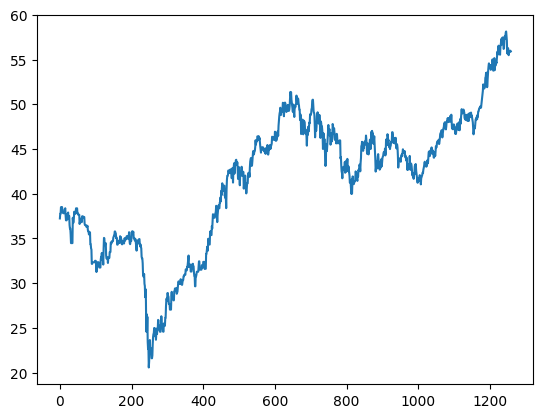

In [6]:
plt.plot(df.Close)

In [7]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1254    53.5157
1255    53.6060
1256    53.6901
1257    53.7773
1258    53.8626
Name: Close, Length: 1259, dtype: float64

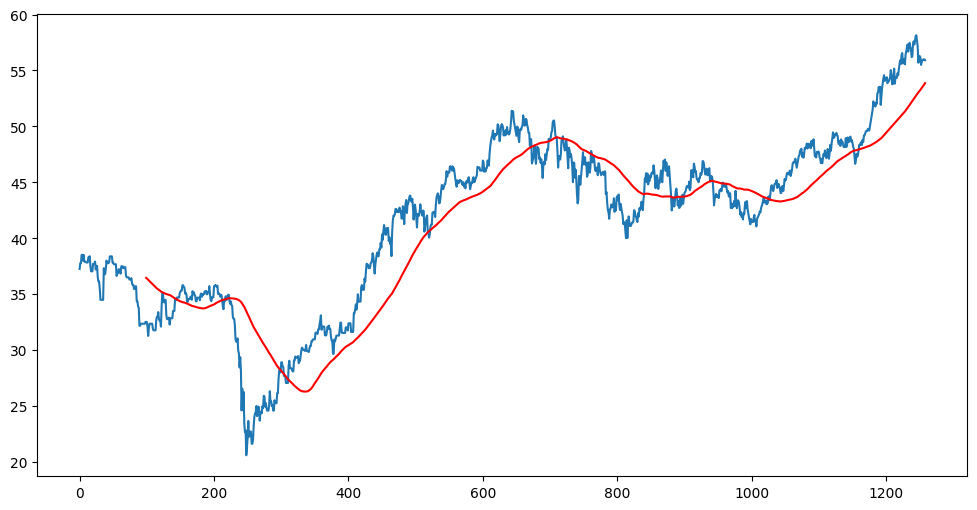

In [8]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')

In [9]:
ma100 = df.Close.rolling(100).mean()
ma100

0           NaN
1           NaN
2           NaN
3           NaN
4           NaN
         ...   
1254    53.5157
1255    53.6060
1256    53.6901
1257    53.7773
1258    53.8626
Name: Close, Length: 1259, dtype: float64

In [10]:
ma200 = df.Close.rolling(200).mean()
ma200

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
          ...   
1254    50.68050
1255    50.73190
1256    50.78205
1257    50.83180
1258    50.88360
Name: Close, Length: 1259, dtype: float64

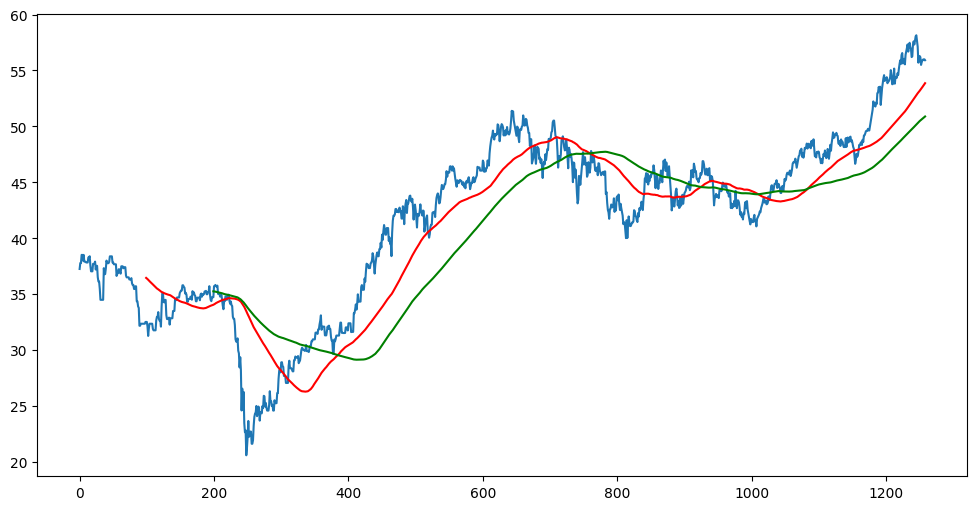

In [11]:
plt.figure(figsize = (12,6))
plt.plot(df.Close)
plt.plot(ma100, 'r')
plt.plot(ma200, 'g')

In [12]:
df.shape

(1259, 5)

In [13]:
#splitting data into train and test

data_training = pd.DataFrame(df['Close'][0:int(len(df)*0.80)])
data_testing = pd.DataFrame(df['Close'][int(len(df)*0.80): int(len(df))])

print(data_training.shape)
print(data_testing.shape)


(1007, 1)
(252, 1)


In [14]:
data_training.head()

,Close
0,37.240002
1,37.770000
2,37.770000
3,38.500000
4,38.500000


In [15]:
data_testing.head()

,Close
1007,41.049999
1008,41.720001
1009,41.849998
1010,41.990002
1011,42.119999


In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

In [17]:
data_training_array = scaler.fit_transform(data_training)
data_training_array.shape

(1007, 1)

In [18]:
x_train = []
y_train = []

for i in range(100, data_training_array.shape[0]):
  x_train.append(data_training_array[i-100: i])
  y_train.append(data_training_array[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)


In [19]:
x_train.shape

(907, 100, 1)

In [20]:
#ML model

In [21]:
from keras. layers import Dense, Dropout, LSTM
from keras. models import Sequential

In [22]:
model = Sequential()
model.add(LSTM(units = 50, activation = 'relu', return_sequences = True,
               input_shape = (x_train.shape[1], 1)))
model.add(Dropout(0.2))


model.add(LSTM(units = 60, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.3))


model.add(LSTM(units = 80, activation = 'relu', return_sequences = True,))
model.add(Dropout(0.4))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(units = 1))

c:\Users\sunde\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 50)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 100, 60)        │        26,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 100, 60)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 100, 80)        │        45,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 100, 80)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 120)            │        96,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 120)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           121 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 178,761 (698.29 KB)

 Trainable params: 178,761 (698.29 KB)

 Non-trainable params: 0 (0.00 B)

In [24]:
model.compile(optimizer='adam',loss = 'mean_squared_error')
model.fit(x_train, y_train, epochs = 50)

Epoch 1/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 20s 208ms/step - loss: 0.2666
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0248
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 197ms/step - loss: 0.0182
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 0.0158
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 196ms/step - loss: 0.0157
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 207ms/step - loss: 0.0139
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 203ms/step - loss: 0.0135
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 208ms/step - loss: 0.0120
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 210ms/step - loss: 0.0117
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 211ms/step - loss: 0.0103
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 246ms/step - loss: 0.0106
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 223ms/step - loss: 0.0116
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step - loss: 0.0095
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 198ms/step - loss: 0.0088
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 6s 220ms/step

In [25]:
model.save('keras_model.h5')

In [26]:
past_100_day = data_training.tail(100)

In [27]:
final_df = pd.concat ([past_100_day,data_testing], ignore_index = True)
final_df.head()

,Close
0,45.049999
1,44.290001
2,44.509998
3,46.060001
4,45.750000


In [28]:
input_data = scaler.fit_transform(final_df)
input_data

array([[0.2339181 ],
       [0.18947376],
       [0.2023391 ],
       [0.29298254],
       [0.27485381],
       [0.29356724],
       [0.25672508],
       [0.32807017],
       [0.31228067],
       [0.28479522],
       [0.28947369],
       [0.25204683],
       [0.24385973],
       [0.24561405],
       [0.23099417],
       [0.25263153],
       [0.25380114],
       [0.27953228],
       [0.27076026],
       [0.28421052],
       [0.34152043],
       [0.34093573],
       [0.32456132],
       [0.29239762],
       [0.27134496],
       [0.27719304],
       [0.30175434],
       [0.26842103],
       [0.26783633],
       [0.29883041],
       [0.30467827],
       [0.24269012],
       [0.23508771],
       [0.26374278],
       [0.25906431],
       [0.23918126],
       [0.18596491],
       [0.10994157],
       [0.14561411],
       [0.15380121],
       [0.17017541],
       [0.15321629],
       [0.16257323],
       [0.15789476],
       [0.14795335],
       [0.18771922],
       [0.18947376],
       [0.195

In [29]:
input_data.shape

(352, 1)

In [30]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
  x_test.append(input_data[i-100: i])
  y_test.append(input_data[i, 0])

In [31]:
x_test , y_test = np.array(x_test), np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(252, 100, 1)
(252,)


In [32]:
#Making Predictions

y_predicted = model.predict(x_test)

8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 213ms/step


In [33]:
y_predicted.shape

(252, 1)

In [34]:
y_test

array([0.        , 0.0391814 , 0.04678357, 0.0549709 , 0.06257307,
       0.07777787, 0.07368433, 0.09532169, 0.10760233, 0.11871359,
       0.1362574 , 0.14795335, 0.12456145, 0.1280703 , 0.13567248,
       0.11578943, 0.11695905, 0.12397653, 0.15672514, 0.1368421 ,
       0.14269018, 0.17719311, 0.21111112, 0.21520467, 0.20584795,
       0.18479529, 0.20000009, 0.22163745, 0.22456138, 0.22456138,
       0.2415205 , 0.20116971, 0.20643287, 0.22280707, 0.21052642,
       0.19883047, 0.17485388, 0.17485388, 0.20760227, 0.21169582,
       0.18538021, 0.21111112, 0.24853798, 0.23976618, 0.24444443,
       0.27017534, 0.28070167, 0.27543851, 0.27192988, 0.28479522,
       0.29239762, 0.26374278, 0.27836266, 0.29766079, 0.32807017,
       0.33567257, 0.33391803, 0.34093573, 0.354386  , 0.3304094 ,
       0.3070175 , 0.32573093, 0.3467836 , 0.36725156, 0.37192981,
       0.39649133, 0.39941526, 0.40643274, 0.36432741, 0.38187145,
       0.35964916, 0.38011691, 0.41111121, 0.40818705, 0.41461

In [35]:
y_predicted

array([[0.16723327],
       [0.16552627],
       [0.16409683],
       [0.16299665],
       [0.16227964],
       [0.16200426],
       [0.16217127],
       [0.16253644],
       [0.16306765],
       [0.16378781],
       [0.1647149 ],
       [0.16586517],
       [0.16723952],
       [0.16877843],
       [0.17044322],
       [0.17222679],
       [0.17410186],
       [0.17602615],
       [0.17801152],
       [0.18003806],
       [0.18209873],
       [0.18418925],
       [0.18632951],
       [0.1885857 ],
       [0.19100223],
       [0.19364487],
       [0.19669792],
       [0.20022194],
       [0.20412028],
       [0.20826983],
       [0.21275535],
       [0.21763636],
       [0.22282192],
       [0.22823584],
       [0.23398072],
       [0.23982862],
       [0.24543801],
       [0.25055182],
       [0.25487134],
       [0.2583253 ],
       [0.26097134],
       [0.26285872],
       [0.26411963],
       [0.26501566],
       [0.26580414],
       [0.2667163 ],
       [0.26798707],
       [0.269

In [36]:
scaler.scale_

array([0.05847952])

In [37]:
scale_factor = 1/0.05953089
y_predicted = y_predicted * scale_factor
y_test = y_test * scale_factor


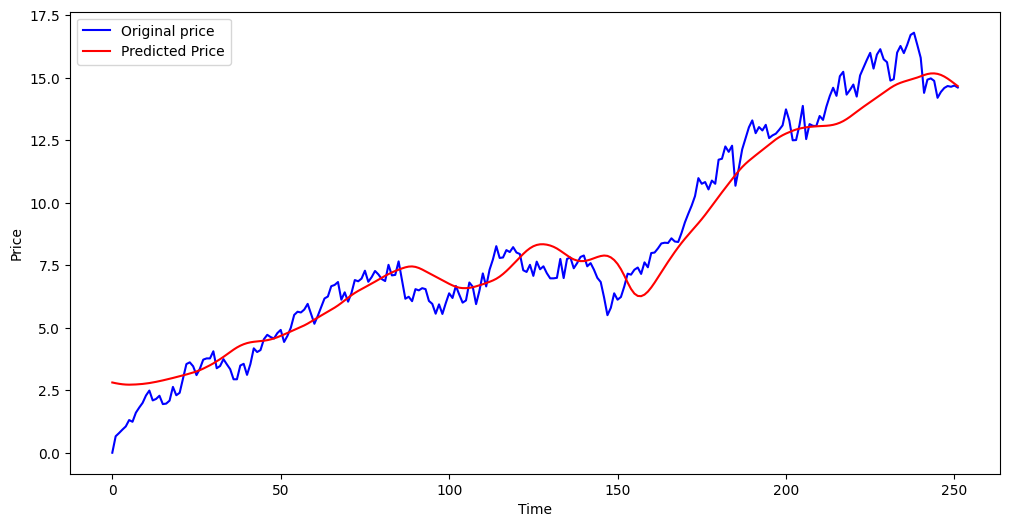

In [38]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b', label = 'Original price')
plt.plot(y_predicted, 'r', label = 'Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━

C:\Users\sunde\AppData\Local\Temp\ipykernel_12996\654591802.py:29: RuntimeWarning: divide by zero encountered in divide
  mape = np.mean(np.abs((y_test_original - y_predicted_original) / y_test_original)) * 100


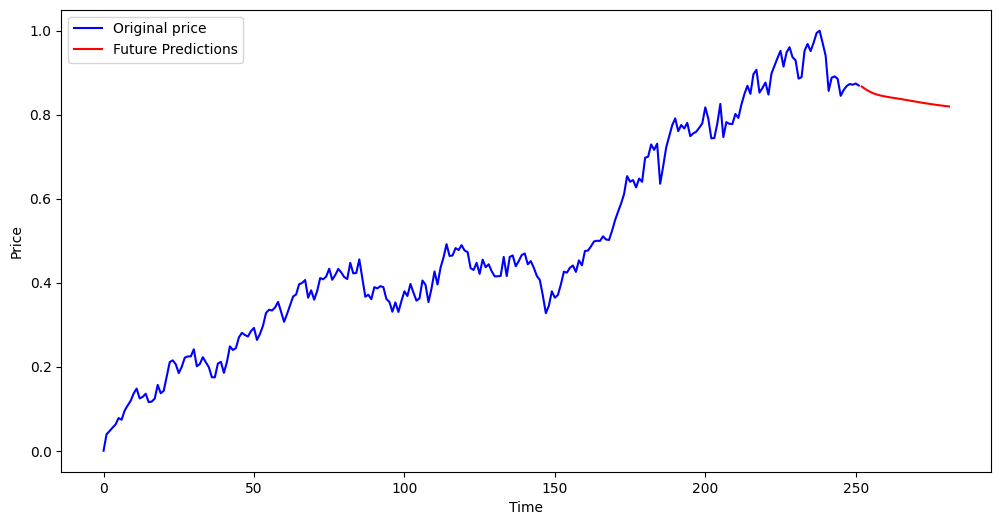

In [39]:
# Future Prediction
future_days = 30  # Number of days to predict into the future
x_input = input_data[-100:]  # Use the last 100 days as input for predicting the next 'future_days'

future_predictions = []  # List to store future predictions

for i in range(future_days):
    x_input = x_input.reshape((1, 100, 1))  # Reshape input for the model
    y_pred = model.predict(x_input)  # Predict next day's price
    future_predictions.append(y_pred[0, 0])  # Append the prediction to the list
    x_input = np.append(x_input[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)  # Update input data by shifting one step forward

# Model Accuracy
from sklearn.metrics import mean_squared_error

# Inverse transform to get the original scale
y_test_original = y_test / scale_factor
y_predicted_original = y_predicted / scale_factor

# Calculate Mean Squared Error
mse = mean_squared_error(y_test_original, y_predicted_original)
print('Mean Squared Error (MSE):', mse)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print('Root Mean Squared Error (RMSE):', rmse)

# Calculate Mean Absolute Percentage Error (MAPE)
mape = np.mean(np.abs((y_test_original - y_predicted_original) / y_test_original)) * 100
print('Mean Absolute Percentage Error (MAPE): {:.2f}%'.format(mape))

# Plotting Future Predictions
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, 'b', label='Original price')
plt.plot(range(len(y_test_original), len(y_test_original) + future_days), future_predictions, 'r', label='Future Predictions')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()


In [42]:
import numpy as np

future_days = 30  # Number of days to predict into the future
x_input = input_data[-100:]  # Use the last 100 days as input for predicting the next 'future_days'

future_predictions = []  # List to store future predictions

for i in range(future_days):
    x_input = x_input.reshape((1, 100, 1))  # Reshape input for the model
    y_pred = model.predict(x_input)  # Predict next day's price
    future_predictions.append(y_pred[0, 0])  # Append the prediction to the list
    x_input = np.append(x_input[:, 1:, :], y_pred.reshape(1, 1, 1), axis=1)  # Update input data by shifting one step forward

print("Predictions for the next 30 days:", future_predictions)


# Example scaling factor for demonstration
scaling_factor = 100  # Assuming 1 unit of predicted value corresponds to $100

# Convert model predictions to prices
future_predictions_prices = [pred * scaling_factor for pred in future_predictions]

print("Predictions for the next 30 days (in terms of price):", future_predictions_prices)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━